In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
dataset=pd.read_csv("city_day.csv")
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## Features ##


In [4]:
dataset.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [5]:
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
# convert 'Date' to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])
#setting date column as index
dataset.set_index('Date', inplace=True)
dataset.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [7]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   PM10        18391 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   O3          25509 non-null  float64
 10  Benzene     23908 non-null  float64
 11  Toluene     21490 non-null  float64
 12  Xylene      11422 non-null  float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(2)
memory usage: 3.6+ MB


In [8]:
dataset.describe()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


<Axes: ylabel='Date'>

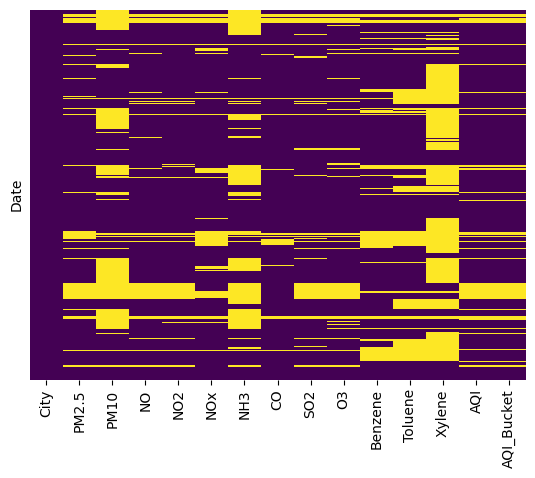

In [9]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [10]:
print(dataset.isnull().sum())

City              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [11]:

(dataset.isnull().sum()/dataset.shape[0]*100) .sort_values(ascending=False)

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
City           0.000000
dtype: float64

## missing values ##

In [13]:
# Missing values
def missing_values_table(dataset):
        # Total missing values
        mis_val = dataset.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * dataset.isnull().sum() / len(dataset)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Dataset city day  has " + str(dataset.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(dataset)
missing_values.style.background_gradient(cmap='Reds')

Dataset city day  has 15 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.300000
PM10,11140,37.700000
NH3,10328,35.000000
Toluene,8041,27.200000
Benzene,5623,19.000000
AQI,4681,15.900000
AQI_Bucket,4681,15.900000
PM2.5,4598,15.600000
NOx,4185,14.200000
O3,4022,13.600000


#### filling the Nan values present in the pollutants with mean (city wise) ####


In [15]:
#dataset.iloc[:, 1:13] = dataset.groupby("City").transform(lambda x: x.fillna(x.mean()))
numeric_columns = dataset.iloc[:, 1:13].select_dtypes(include=['float', 'int']).columns
print(numeric_columns)
dataset[numeric_columns] = dataset.groupby("City")[numeric_columns].transform(lambda x: x.fillna(x.mean()))
dataset

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene'],
      dtype='object')


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.000000,0.020000,0.000000,NaN,NaN
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.680000,5.500000,3.770000,NaN,NaN
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.800000,16.400000,2.250000,NaN,NaN
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.430000,10.140000,1.000000,NaN,NaN
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.010000,18.890000,2.780000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory


<Axes: ylabel='Date'>

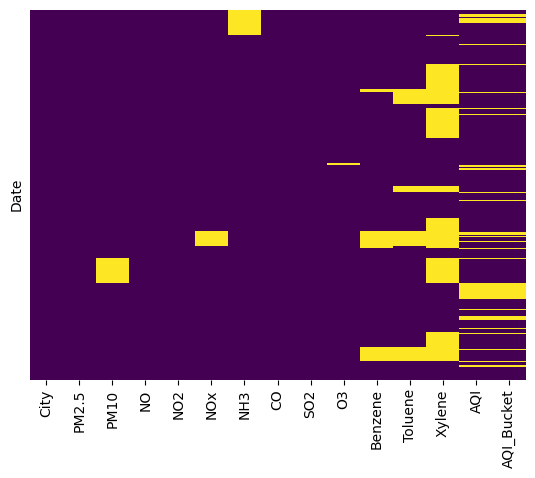

In [16]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False, cmap='viridis')


In [17]:
numeric_columns = dataset.iloc[:, 1:13].select_dtypes(include=['float', 'int']).columns
print(numeric_columns)
dataset[numeric_columns] = dataset[numeric_columns].fillna(dataset[numeric_columns].mean())
dataset

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene'],
      dtype='object')


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.000000,0.020000,0.000000,NaN,NaN
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.680000,5.500000,3.770000,NaN,NaN
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.800000,16.400000,2.250000,NaN,NaN
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.430000,10.140000,1.000000,NaN,NaN
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.010000,18.890000,2.780000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory


<Axes: ylabel='Date'>

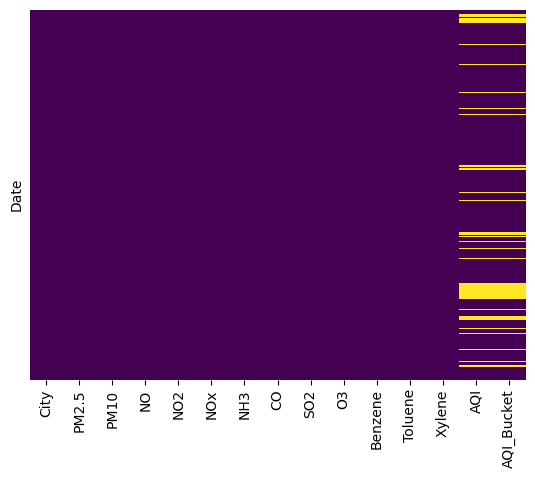

In [18]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False, cmap='viridis')

## The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3. ##

#### calculating Sub-Index ####

In [21]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

dataset["PM10_SubIndex"] = dataset["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))
    
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

dataset["PM2.5_SubIndex"] = dataset["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))


# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

dataset["SO2_SubIndex"] = dataset["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

dataset["NOx_SubIndex"] = dataset["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

dataset["NH3_SubIndex"] = dataset["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

dataset["CO_SubIndex"] = dataset["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

dataset["O3_SubIndex"] = dataset["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

In [22]:
dataset.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,...,0.00,NaN,NaN,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,...,3.77,NaN,NaN,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,...,2.25,NaN,NaN,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,...,1.00,NaN,NaN,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,...,2.78,NaN,NaN,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000


### Filling the Nan values of AQI column by taking maximum values out of sub-Indexes ###

In [24]:
dataset["AQI"] = dataset["AQI"].fillna(round(dataset[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))
dataset

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,...,0.000000,149.0,NaN,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,...,3.770000,123.0,NaN,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,...,2.250000,300.0,NaN,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,...,1.000000,123.0,NaN,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,...,2.780000,329.0,NaN,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,...,0.730000,41.0,Good,50.000000,25.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,...,0.380000,70.0,Satisfactory,74.000000,40.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,...,0.000000,68.0,Satisfactory,65.000000,36.666667,10.00,22.50,2.50,0.000000,30.000000


<Axes: ylabel='Date'>

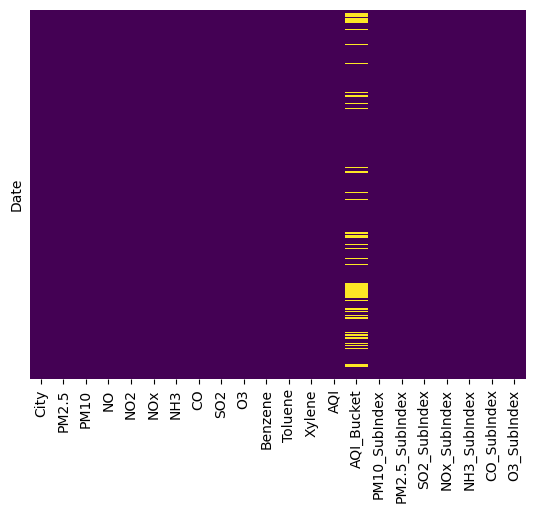

In [25]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## AQI Bucket ##

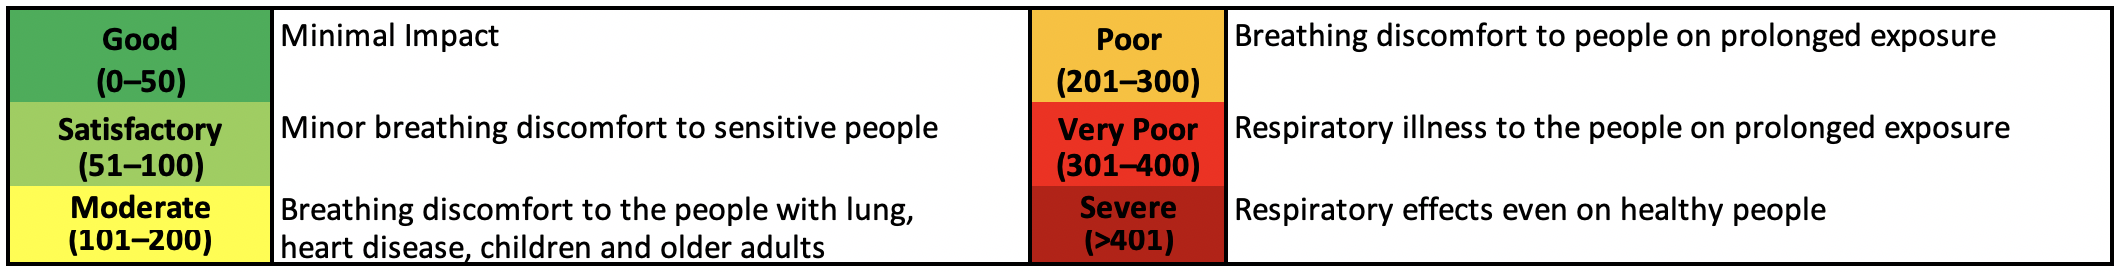

In [27]:
from IPython import display 

display.Image("AQI.png",width = 700, height = 500)

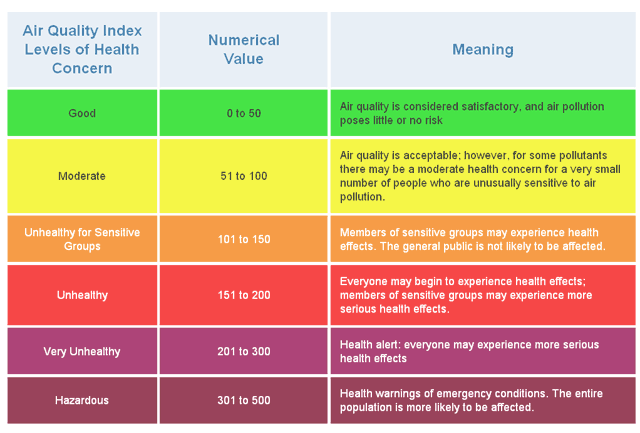

In [28]:
display.Image("AQItable.gif",width = 700, height = 300)

### calculating AQI bucket and filling the NAN value present ###

In [30]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
dataset["AQI_Bucket"] = dataset["AQI_Bucket"].fillna(dataset["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [31]:
dataset

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,...,0.000000,149.0,Moderate,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
2015-01-02,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,...,3.770000,123.0,Moderate,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2015-01-03,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,...,2.250000,300.0,Poor,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
2015-01-04,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,...,1.000000,123.0,Moderate,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
2015-01-05,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,...,2.780000,329.0,Very Poor,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,...,0.730000,41.0,Good,50.000000,25.000000,10.00,23.75,3.00,0.000000,23.000000
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,...,0.380000,70.0,Satisfactory,74.000000,40.000000,15.00,20.00,2.75,0.000000,30.000000
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,...,0.000000,68.0,Satisfactory,65.000000,36.666667,10.00,22.50,2.50,0.000000,30.000000


<Axes: ylabel='Date'>

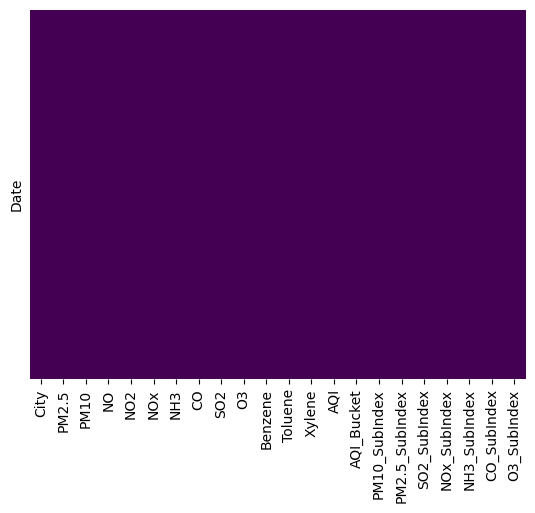

In [32]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
print(dataset.isnull().sum())

City              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene            0
AQI               0
AQI_Bucket        0
PM10_SubIndex     0
PM2.5_SubIndex    0
SO2_SubIndex      0
NOx_SubIndex      0
NH3_SubIndex      0
CO_SubIndex       0
O3_SubIndex       0
dtype: int64


In [34]:
dataset.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

In [35]:
dataset_AQI = dataset.copy()
dataset_AQI.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

## Correlation ##

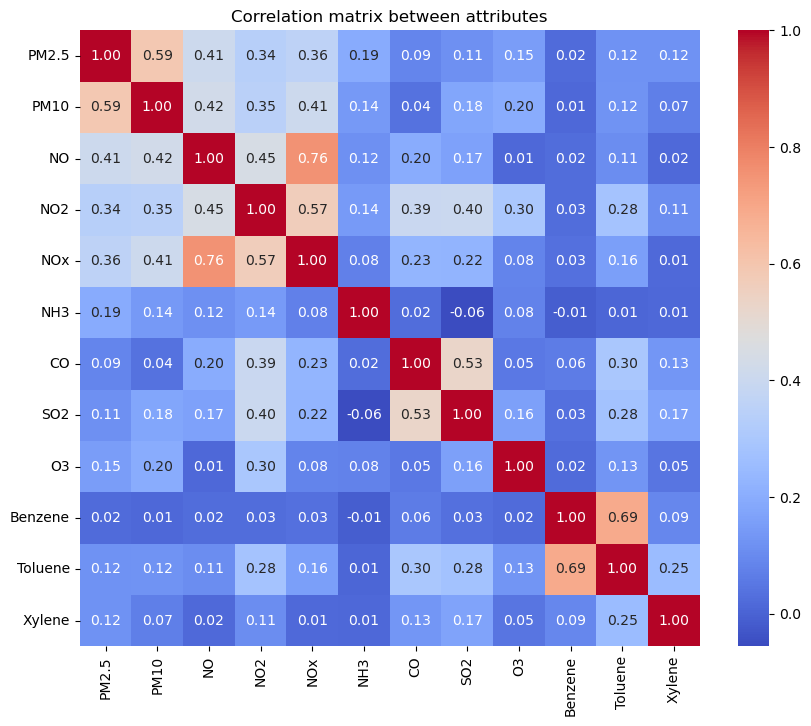

In [37]:
# Visualization of the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.iloc[:, 1:13].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix between attributes')
plt.show()

Distribution of different pollutants in last 5 years


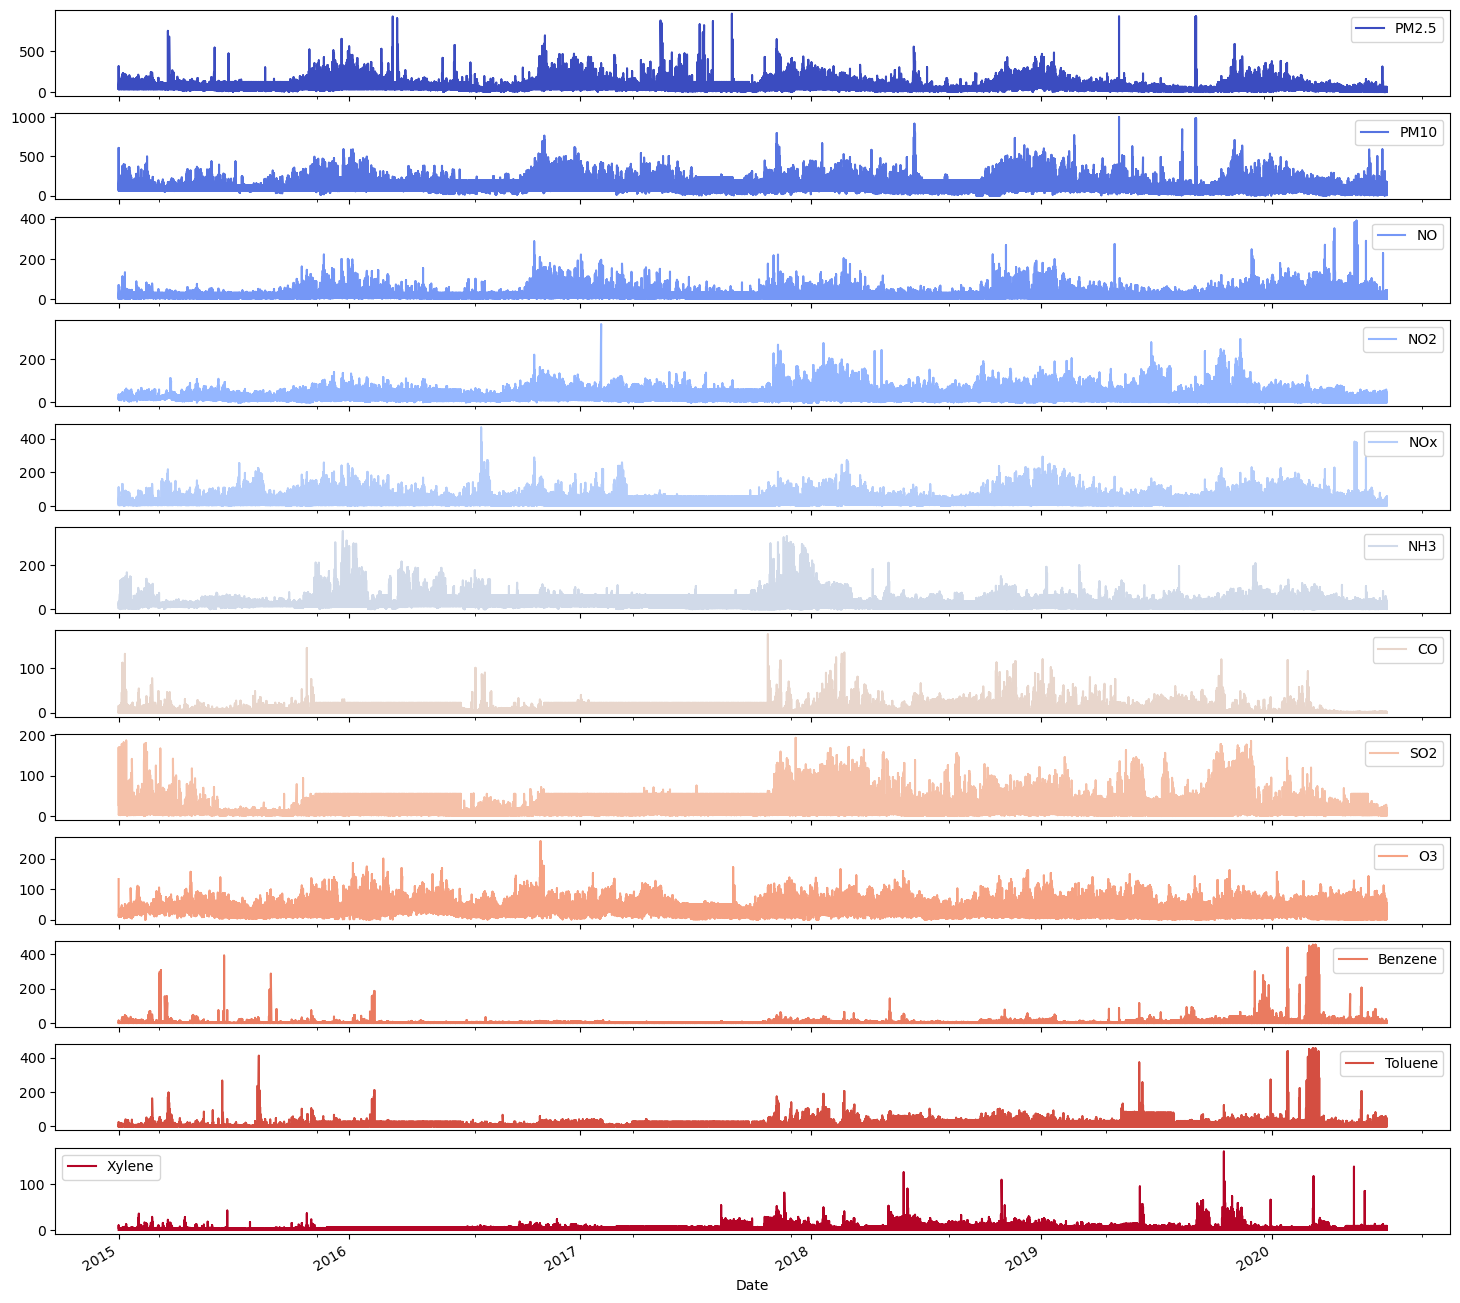

In [38]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
dataset_AQI= dataset_AQI[pollutants]

print('Distribution of different pollutants in last 5 years')
dataset_AQI.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

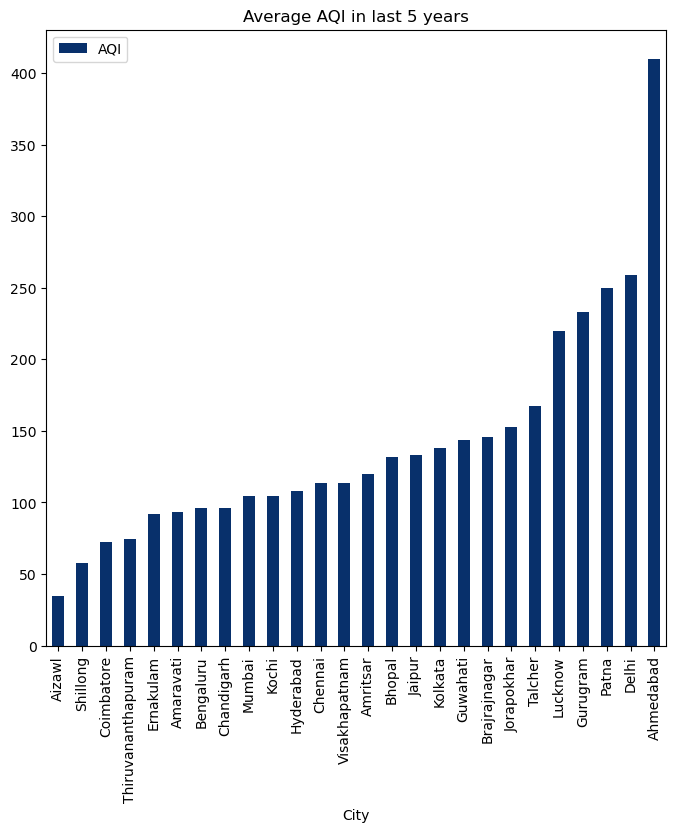

In [39]:
dataset[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');

##### synthese : By above graph we can conclude that Ahmedabad is the heighest polluted city followed by Delhi and Gurugram #####

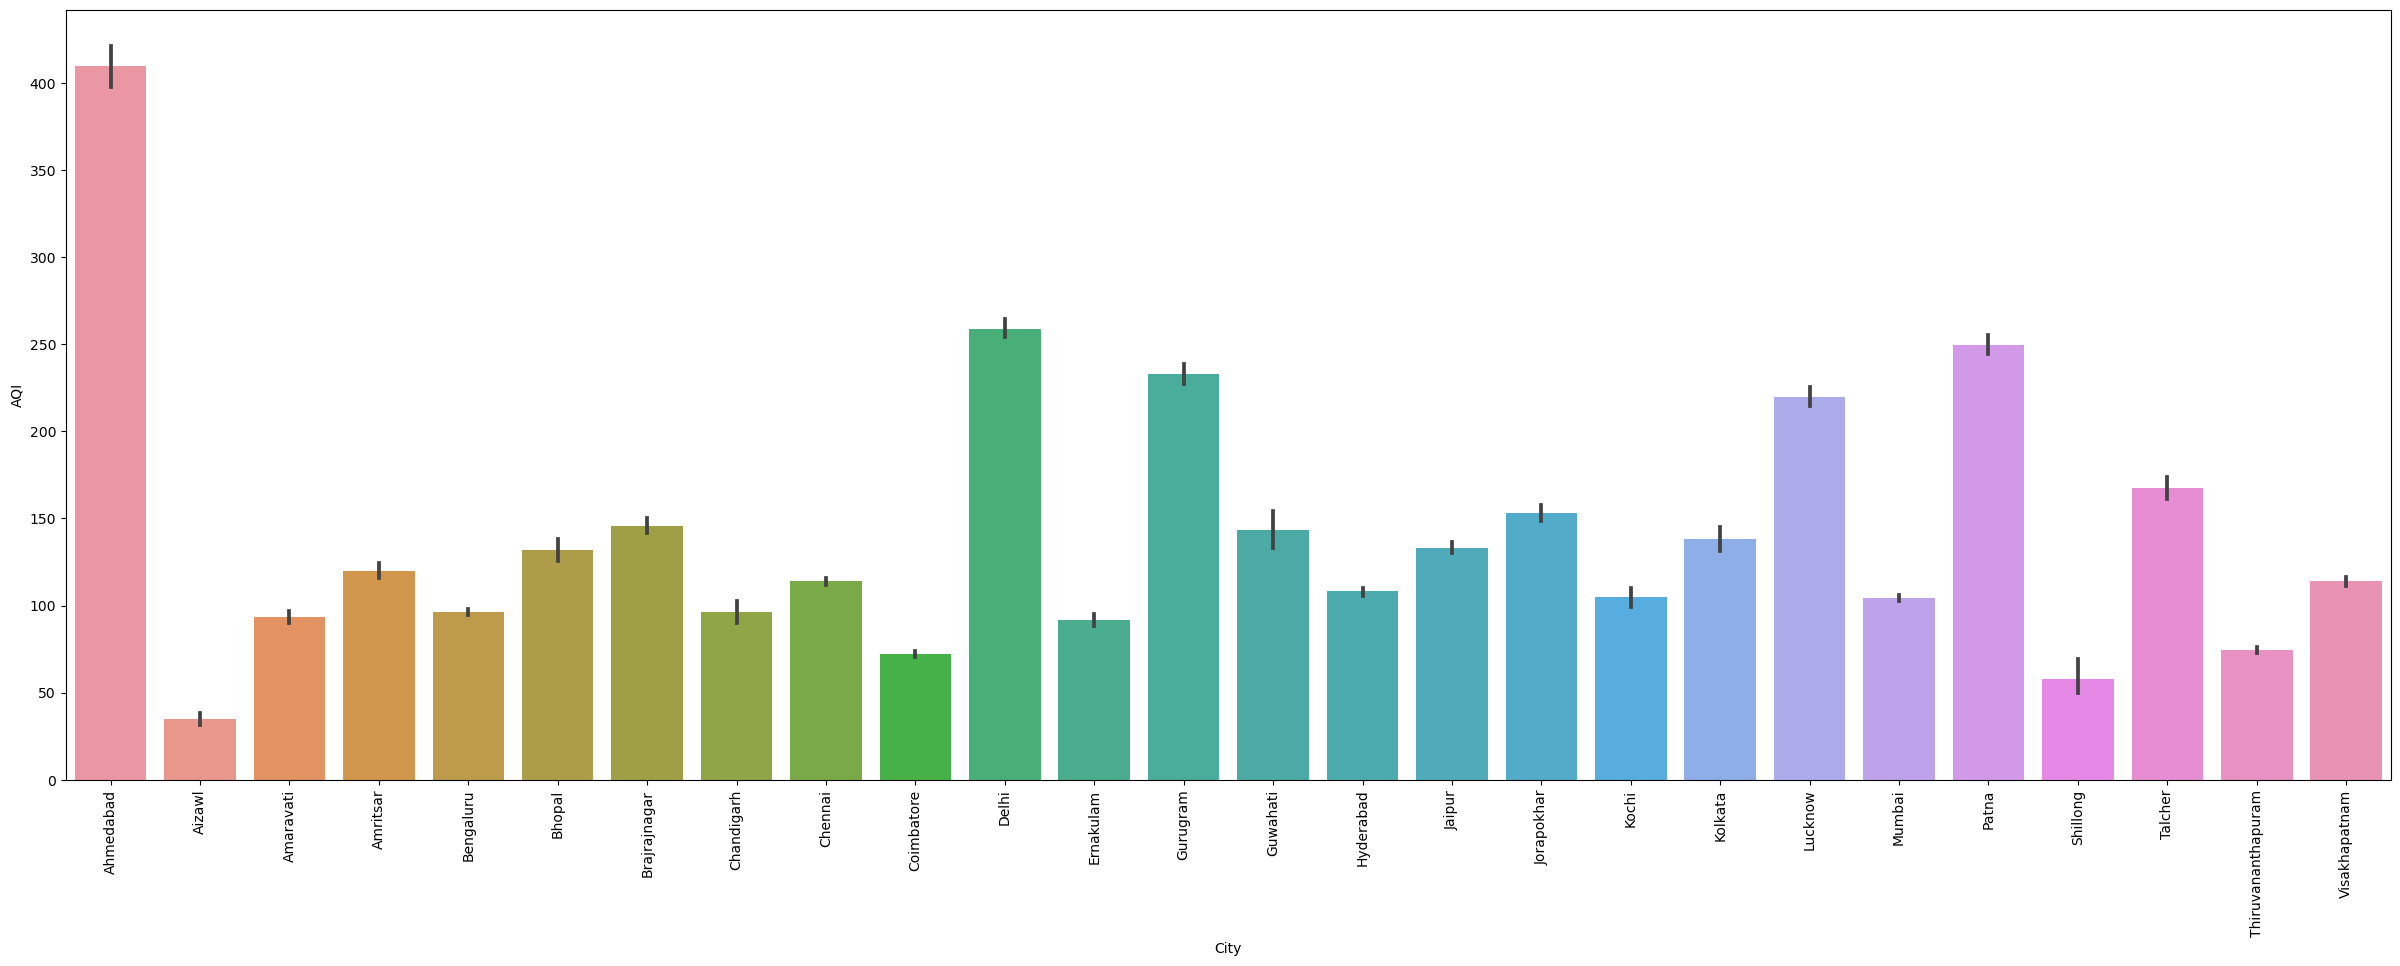

In [41]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='AQI',data=dataset);

## Creating Model for predicting the Output ##

In [79]:
from sklearn.model_selection import train_test_split
X= dataset[['PM2.5', 'PM10', 'SO2', 'NOx','NH3', 'CO', 'O3']]
Y = dataset[['AQI']]
print(X)
print(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

                PM2.5        PM10    SO2    NOx        NH3     CO      O3
Date                                                                     
2015-01-01  67.854497  114.584029  27.64  17.15  23.024137   0.92  133.36
2015-01-02  67.854497  114.584029  24.55  16.46  23.024137   0.97   34.06
2015-01-03  67.854497  114.584029  29.07  29.70  23.024137  17.40   30.70
2015-01-04  67.854497  114.584029  18.59  17.97  23.024137   1.70   36.08
2015-01-05  67.854497  114.584029  39.33  37.76  23.024137  22.10   39.31
...               ...         ...    ...    ...        ...    ...     ...
2020-06-27  15.020000   50.940000   8.55  19.54  12.470000   0.47   23.30
2020-06-28  24.380000   74.090000  12.72  16.53  11.990000   0.52   30.14
2020-06-29  22.910000   65.730000   8.42  18.33  10.710000   0.48   30.96
2020-06-30  16.640000   49.970000   9.84  18.80  10.030000   0.52   28.30
2020-07-01  15.000000   66.000000   2.10  14.05   5.200000   0.59   17.05

[29531 rows x 7 columns]
            

## Linear Regression  ##

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the following code for splitting your data
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the scaled training data
model.fit(x_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()

# Create a comparison table
comparison_df = pd.DataFrame({'Actual AQI': y_test['AQI'].values, 'Predicted AQI': y_pred.flatten()})
comparison_df['Residual'] = comparison_df['Actual AQI'] - comparison_df['Predicted AQI']

# Calculate the coefficient of determination (R-squared)
r_squared = r2_score(y_test, y_pred)

# Calculate the margin of error
margin_of_error = comparison_df['Residual'].abs().mean()

# Display the comparison table, R-squared, and margin of error
print("\nComparison Table:")
print(comparison_df.head(10))  # Displaying the first 10 rows for illustration
print("\nCoefficient of Determination (R-squared):", r_squared)
print("Margin of Error:", margin_of_error)


NameError: name 'x_train' is not defined